<a href="https://colab.research.google.com/github/sharon-1234/Fmml/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

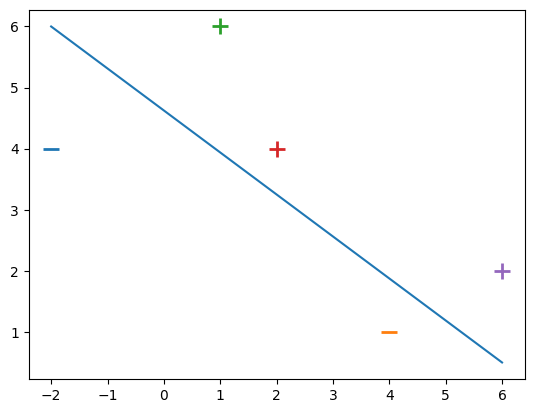

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

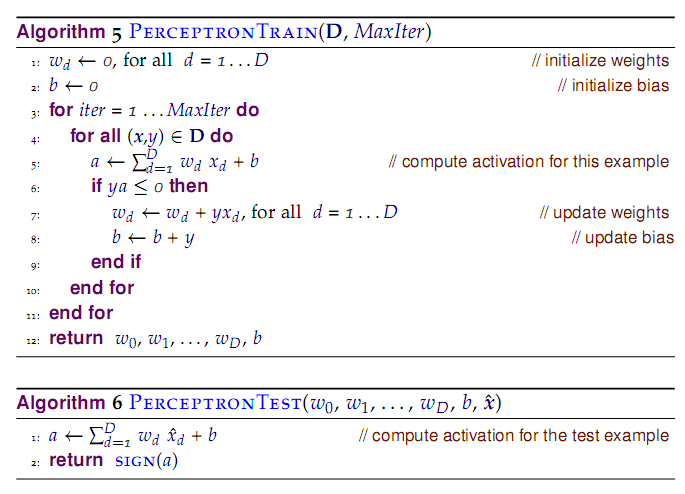

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

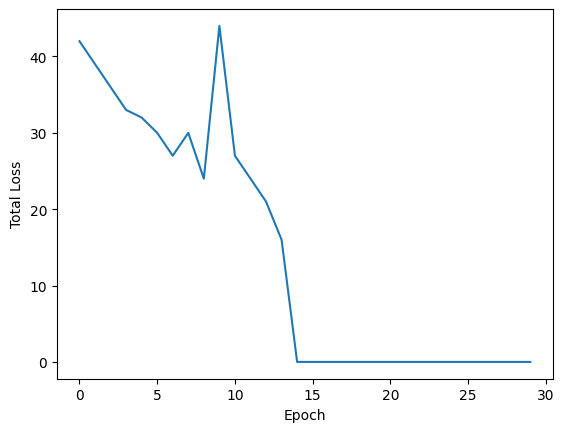

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

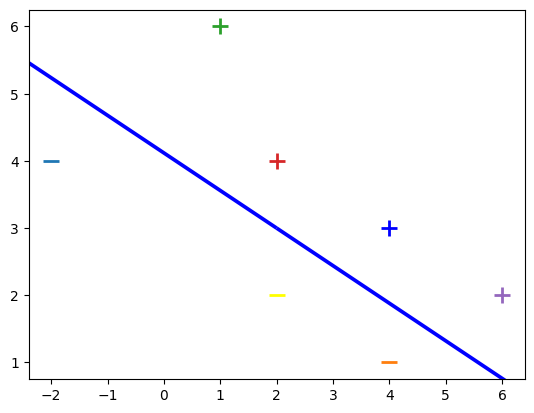

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



ANSWERS:

#1)

In [11]:

import numpy as np
import matplotlib.pyplot as plt

def perceptron_algo_plot_error(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        misclassifications = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                misclassifications += 1
                w = w + eta * X[i] * Y[i]
        errors.append(misclassifications)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.title('Training Error vs. Epoch')

    return w

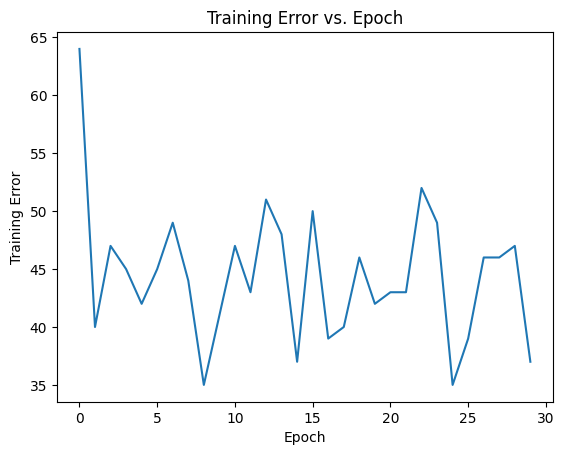

In [12]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Banknote Authentication Dataset from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ["variance", "skewness", "curtosis", "entropy", "class"]
data = pd.read_csv(url, names=column_names)

# Extract features and labels
X = data.drop("class", axis=1).values
y = data["class"].values

# Map labels to -1 (class 0) and 1 (class 1)
y = 2 * y - 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train the perceptron and plot the training error
w_banknote = perceptron_algo_plot_error(X_train_std, y_train)

#2)

The learning rate is a crucial hyperparameter in the training of machine learning models, including the perceptron. A learning rate that is too large may lead to overshooting the minimum, making the algorithm fail to converge, while a learning rate that is too small may result in slow convergence or getting stuck in a local minimum. It's important to choose an appropriate learning rate for the specific problem.

You can experiment with different learning rates to observe their effects on the convergence of the perceptron algorithm. Below is an example where I vary the learning rate and observe the training error plot. Please note that the optimal learning rate may vary depending on the dataset.

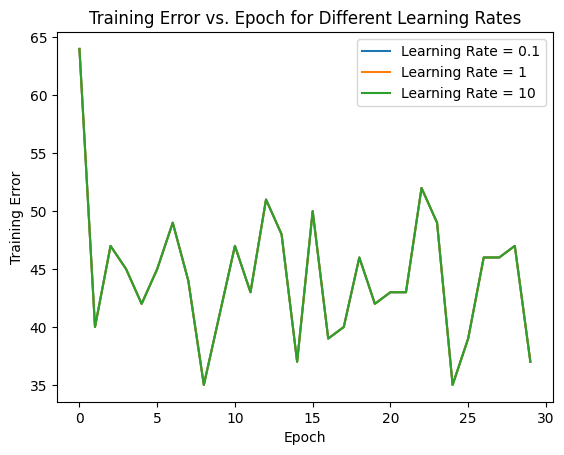

In [13]:

import numpy as np
import matplotlib.pyplot as plt

def perceptron_algo_plot_error(X, Y, eta=1):
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        misclassifications = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                misclassifications += 1
                w = w + eta * X[i] * Y[i]
        errors.append(misclassifications)

    plt.plot(errors, label=f'Learning Rate = {eta}')
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.title('Training Error vs. Epoch for Different Learning Rates')

# Example usage:
perceptron_algo_plot_error(X_train_std, y_train, eta=0.1)
perceptron_algo_plot_error(X_train_std, y_train, eta=1)
perceptron_algo_plot_error(X_train_std, y_train, eta=10)

plt.legend()
plt.show()

Experiment with different learning rates, observe the training error plots, and see how quickly or slowly the perceptron converges. If the learning rate is too large, you might observe oscillations or divergence in the training error plot. If it's too small, the convergence might be slow. Choose a learning rate that provides a good balance between convergence speed and stability.

#3)If you run the perceptron algorithm on a toy dataset that is not linearly separable, you may observe that the algorithm does not converge, and the weights keep getting updated in an attempt to find a hyperplane that separates the classes. Let's analyze the provided example:***

Here, the dataset X is not linearly separable because there is no hyperplane that perfectly separates the classes. The labels in y indicate that three out of the five samples are labeled as -1 and two as 1. When you run the perceptron algorithm on this dataset, you may observe that the training error does not reach zero, and the weights keep getting updated in an attempt to find a hyperplane.

If you print the final weights, you might notice that they are not able to perfectly separate the classes. The perceptron algorithm is limited to finding a linear decision boundary, and if the data is not linearly separable, it cannot achieve zero training error. It's a fundamental limitation of the perceptron algorithm.

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [16]:
y = np.array([-1, -1, 1, -1])

In [17]:
print(perceptron_algo_plot(X, y))

IndexError: ignored

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.